Material for my MEdium post @ https://mageswaran1989.medium.com/a-mind-map-of-dynamic-programming-patterns-to-ace-interviews-72ff0370bb27

# Problem Type 1: 
Find a final result value for a given problem with single input which can have repetitive intermediate computation.

## Fibonacci Sequence

![](https://miro.medium.com/max/1400/1*ihViJG8E4df512tIMcDtkA.png)


In [1]:
def fib(n, memo = {}):
    
    if n in memo:  # check and return the value if present in memo
        return memo[n]

    if n <= 1:
        return n
    else:
        # calculate for first time
        memo[n] = fib(n-1, memo) + fib(n-2, memo)   # logic
        return memo[n]

In [ ]:
%time
fib(6)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


8

In [ ]:
%time
fib(50)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


12586269025

Runtime: O(n)

**Space: O(n)**

# Problem Type 2 : 

Find a final result value for a given problem with multiple inputs, again which can have repetitive intermediate computations.


## Grid Traveller
Say that you are a traveller on a grid. You begin in the top-left corner and your goal is to travel to the bottom-right corner. You may only move down or right. In how many ways can you travel to the goal on a grid with dimension m * n?
Write a function grid_traveller(m, n) that calculates this.


![](https://miro.medium.com/max/1400/1*wuMyHAi6GLxpxarXLHsQ_A.png)


In [ ]:
def grid_travel(m,n, memo={}):
    """

    :param m: Total number of rows
    :param n: Total number of columns
    :return:
    """
    
    # make the key with m & n, to differentiate rows and cols
    key = f"m{m}n{n}"
    if key in memo:
        return memo[key]

    # when we are in last cell or only one cell, there is only one way
    if (m == 1 and n==1):  
        return 1
    # when we are in no cell there is no way
    elif (m ==0 or n ==0):
        return 0
    else:
        # logic: add all the returned values from leaf nodes
        memo[key] = grid_travel(m-1, n, memo) + grid_travel(m, n-1, memo)
        return memo[key]

In [ ]:
grid_travel(1,1)

1

In [ ]:
grid_travel(2,3)

3

In [ ]:
grid_travel(3,3)

6

In [ ]:
grid_travel(18,18)

2333606220

**Time: O(n * m)**

**Space: O(n+m)**

# Problem Type 3: Decision Problem

Return a true or false after exploring all possible solution space from a given list of inputs and a target

## canSum
Write a function canSum(target_sum, numbers) that takes in a target sum and an array of numbers as arguments.
The function should return a boolean indicating whether or not it is possible to generate the target sum using numbers from the array.
You may use an element of the array as many times as needed and al inputs are non negative

![](https://miro.medium.com/max/1400/1*jkS5H24fSUQd1d35uZFvLw.png)

In [ ]:
def can_sum(target_sum, values, memo={}):
    """

    :param target_sum:
    :param values: list
    :return:
    """
    # print(memo, values)
    if target_sum in memo:
        return memo[target_sum]

    if target_sum == 0:
        return True
    if target_sum < 0:
        return False

    for value in values:
        reminder = target_sum - value
        if can_sum(reminder, values, memo):
            memo[target_sum] = True
            return True

    # If no way leads to zero then there is no possible values leads to sum
    memo[target_sum] = False
    return False


In [ ]:
print(can_sum(7, [2, 3], {}))

True


In [ ]:
print(can_sum(7, [5, 3, 4, 7], {}))

True


In [ ]:
print(can_sum(7, [2, 4], {}))

False


In [ ]:
print(can_sum(8, [2, 3, 5], {}))

True


In [ ]:
print(can_sum(300, [7, 14], {}))

False


**m = target sum**

**n = array length**

**Time: O(n*m)**

**Space: O(m)** 

# Problem Type 4: Combination Problem

Find possible combination for given target and list of possible values.

## How Sum

Write a function how_much(target_sum, numbers), that takes in a target_sum and an array of numbers as arguments.
The function should return an array containing any combination of elements that add up to exactly the target sum. If there is no combination that adds up to the target sum, return null.
If there are multiple combinations possible, you may return any single one.

![](https://miro.medium.com/max/1400/1*hzeQFLqK0n-_S8F-bOjCeg.png)

In [ ]:
def how_sum(target_sum, values, memo={}):
    if target_sum in memo:
        return memo[target_sum]

    if target_sum == 0:
        return []
    if target_sum < 0:
        return None

    for value in values:
        ret = how_sum(target_sum - value, values, memo)
        if ret is not None:
            ret.append(value)
            memo[target_sum] = ret
            return ret

    memo[target_sum] = None
    return None


print(how_sum(7, [2, 3], {}))
print(how_sum(7, [5, 3, 4, 7], {}))
print(how_sum(7, [2, 4], {}))
print(how_sum(8, [2, 3, 5], {}))
print(how_sum(300, [7, 14], {}))

[3, 2, 2]
[4, 3]
None
[2, 2, 2, 2]
None


# Problem Type 5: Optimization Problem
Find all possible combination for given target and list of possible values and return the best one

## Best Sum
Write a function best_sum(target_sum, numbers) that takes in a target sum and an array of numbers as arguments.
The function should return an array containing the shortest combination of numbers that add up to exactly the target sum.
If there is a tie for the shortest combination, you may return any on of the shortest

![](https://miro.medium.com/max/1400/1*1E8Ts7CrxsWEGJeEH19n6g.png)

In [ ]:
%time
def best_sum(target_sum, values, memo):

    if target_sum in memo:
        return memo[target_sum]

    if target_sum == 0:
        return []

    if target_sum < 0:
        return None

    best_pair = None

    for value in values:
        ret = best_sum(target_sum=target_sum - value, values=values, memo=memo)
        if ret is not None:
            res = ret + [value]
            if best_pair is None or len(res) < len(best_pair):
                best_pair = res
                memo[target_sum] = best_pair
                # return best_pair # Dont return the value until all possible combinations are evaluated for child tree

    memo[target_sum] = best_pair
    return memo[target_sum]


print(best_sum(7, [2, 3], {}))
print(best_sum(7, [5, 3, 4, 7], {}))
print(best_sum(7, [2, 4], {}))
print(best_sum(8, [2, 5, 3], {}))
print(best_sum(8, [2, 3, 5], {}))
print(best_sum(300, [7, 14], {}))
print(best_sum(100, [1,2,5,25], {}))
print(best_sum(4830, [7, 14], {}))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
[3, 2, 2]
[7]
None
[3, 5]
[5, 3]
None
[25, 25, 25, 25]
[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 

**m = target sum , n = array length**

**Time: O(n*m²)**

**Space: O(m²)**

# Time to test our understanding!

## Can Construct

Write function can_construct(target, word_bank) that accepts a target string and an array of strings
The function should return a boolean indicating whether or not the target can be constructed by concatenating elements of the word_bank array.
You may reuse elements of word_bank as many times as needed

In [ ]:
def can_construct(target, word_bank, memo={}):

    if target in memo:
        return memo[target]

    if target == '':
        return True # When we found a way reconstruct the string

    # Return true if any of branch returns true
    for word in word_bank:
        # check for matching prefix
        if target.startswith(word):
            suffix = target[len(word):]
            if can_construct(suffix, word_bank):
                memo[suffix] = True
                return True

    # If no branch leads to positive case, return false
    memo[target] = False
    return False

In [ ]:
can_construct("abcdef", ['ab', 'abc', 'cd', 'def', 'abcd']) # true

True

In [ ]:
can_construct("skateboard", ['bo', 'rd', 'ate', 't', 'ska', 'sk', 'boar']) # false

False

In [ ]:
can_construct("enterapotentpot", ['a', 'p', 'ent', 'enter', 'ot', 'o', 't']) # true


True

In [ ]:
can_construct("eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeef", ['e', 'ee', 'eee', 'eeee', 'eeeee', 'eeeeee']) # false

False

**m = target word length , n = word bank length**

**Time: O(n * m * m) n branches for each element in the list and m subtract operation in each branch and m operation to slice array**

**Space: O(m*m) m for stack depth and m for to store sliced array**

## Count Construct

Write a function count_construct(target, word_bank) taht accepts a target string and an array of strings.
The function should return the number of ways that the target can be constructed by concatenating elements of the word_bank array.
You may reuse elements of word_bank as many time as needed.

In [ ]:
def count_contruct(target, word_bank, memo={}):

  if target in memo:
    return memo[target]
  if len(target) == 0 :
    return True

  total_ways = 0
  for word in word_bank:
    if target.startswith(word):
      suffix = target[len(word):]
      total_ways += count_contruct(suffix, word_bank)
      
  memo[target] = total_ways
  return total_ways



In [ ]:
print(count_contruct("abcdef", ['ab', 'abc', 'cd', 'def', 'abcd'])) # 1
print(count_contruct("skateboard", ['bo', 'rd', 'ate', 't', 'ska', 'sk', 'boar'])) # 0
print(count_contruct("enterapotentpot", ['a', 'p', 'ent', 'enter', 'ot', 'o', 't'])) # 4

1
0
4


In [ ]:
count_contruct("eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeef", ['e', 'ee', 'eee', 'eeee', 'eeeee', 'eeeeee']) # false

0


**m = target word length , n = word bank length.**

**Time: O(n * m * m) n branches for each element in the list and m subtract   operation in each branch and m operation to slice array.**

**Space: O(m*m) m for stack depth and m for to store sliced array.**

## All Construct

Write a function all_construct(target, word_bank) that accepts a target string and an array of strings
The function should return a 2D array containing all of the ways that the target can be constructed by concatenating elements of the word bank array. Each element of the 2D array should represent one combination that constructs the target.
You may reuse elements of the word bank as many times as needed.

In [ ]:
def all_construct(target, word_bank, memo={}):

    if target in memo:
        return memo[target]

    if target in memo:
        return memo[target]

    if target == '':
        return [[]]

    res = []
    for word in word_bank:
        if target.startswith(word):
            suffix = target[len(word):]
            suffix_ways = all_construct(suffix, word_bank)
            target_ways = list(map(lambda l: l + [word], suffix_ways))
            res.extend(target_ways)

    memo[target] = res

    return res


print(all_construct("purple", ["purp", "p", "ur", "le", "purpl"])) # 2
# print(all_construct("abcdef", ["ab", "abc", "cd", "def", "abcd"])) # 1
print(all_construct("abcdef", ["ab", "abc", "cd", "def", "abcd", "ef", "c"], dict()))  # 5
"""
[
[ab, cd, ef]
[ab, c, def]
[abc, def]
[abcd, ef]
]
"""

print(all_construct("skateboard", ["bo", "rd", "ate", "t", "ska", "sk", "boar"])) # 0
print(all_construct("enterapotentpot", ["a", "p", "ent", "enter", "ot", "o", "t"])) # 4
print(all_construct("eeeeeeeeeeeeeeeeeeeeeeeeeeeeeee", ["e", "ee", "eee", "eeee", "eeeee", "eeeeee"])) # 0

[['le', 'purp'], ['le', 'p', 'ur', 'p']]
[['ef', 'cd', 'ab'], ['def', 'c', 'ab'], ['def', 'abc'], ['ef', 'abcd']]
[]
[['ot', 'p', 'ent', 'ot', 'p', 'a', 'enter'], ['t', 'o', 'p', 'ent', 'ot', 'p', 'a', 'enter'], ['ot', 'p', 'ent', 't', 'o', 'p', 'a', 'enter'], ['t', 'o', 'p', 'ent', 't', 'o', 'p', 'a', 'enter']]


**m = target word length , n = number of words in word bank length**

**Time: O(n^m ) If complexity is exponential i.e m^n then we can ignore additional complexity like slicing the array**

**Space: O(m)**

## Cutting a Rod

Given a rod of length n inches and an array of prices that includes prices of all pieces of size smaller than n. Determine the maximum value obtainable by cutting up the rod and selling the pieces. For example, if the length of the rod is 8 and the values of different pieces are given as the following, then the maximum obtainable value is 22 (by cutting in two pieces of lengths 2 and 6) 

```
length   | 1   2   3   4   5   6   7   8  
--------------------------------------------
price    | 1   5   8   9  10  17  17  20
```

And if the prices are as following, then the maximum obtainable value is 24 (by cutting in eight pieces of length 1) 

```
length   | 1   2   3   4   5   6   7   8  
--------------------------------------------
price    | 3   5   8   9  10  17  17  20
```

In [ ]:
import sys
def cutting_rod(length, price_list, memo):
  if length == 0:
    return 0

  max_cost = -sys.maxsize

  for i in range(1, length+1):
      cost = price_list[i-1] + cutting_rod(length - i, price_list)
      if cost > max_cost:
        max_cost = cost

  return max_cost


In [ ]:
cutting_rod(4, [7,6,5,4])

28

In [ ]:
cutting_rod(8, [1,5,8,9,10,17,17,20])

22

In [ ]:
import sys
def cutting_rod(length, price_list, memo):
  if length == 0:
    return 0

  max_cost = -sys.maxsize

  for i in range(1, length+1):
      cost = price_list[i-1] + cutting_rod(length - i, price_list)
      if cost > max_cost:
        max_cost = cost

  return max_cost


In [ ]:
def cutting_rod(length, price_list):
  cut_price = [0] * (length + 1)
  
  for i in range(1, length+1):
    max_value = -sys.maxsize
    for j in range(i):
      max_value = max(cut_price[i-j-1] + price_list[j], max_value)
    cut_price[i] = max_value
  return cut_price[length]

In [ ]:
cutting_rod(4, [7,6,5,4])

28

In [ ]:
cutting_rod(8, [1,5,8,9,10,17,17,20])

22

## Coin Change

Given a value N, if we want to make change for N cents, and we have infinite supply of each of S = { S1, S2, .. , Sm} valued coins, how many ways can we make the change? The order of coins doesn’t matter.
For example, for N = 4 and S = {1,2,3}, there are four solutions: {1,1,1,1},{1,1,2},{2,2},{1,3}. So output should be 4. For N = 10 and S = {2, 5, 3, 6}, there are five solutions: {2,2,2,2,2}, {2,2,3,3}, {2,2,6}, {2,3,5} and {5,5}. So the output should be 5.

In [ ]:
def coin_change(n, coins, memo):

  if n in memo:
    return memo[n]
  
  if n == 0: # when 
    return 1

  if n < 0:
    return 0

  total_ways = 0

  for coin in coins:
      total_ways += coin_change(n-coin, coins, memo)
      
  memo[n] = total_ways

  return total_ways

In [ ]:
coin_change(4, [1,2,3], {})

7

In [ ]:
coin_change(10, [2,5,3,6], {})

17

In [ ]:
def coin_change1(n, coins, memo):
  if n in memo:
    return memo[n]

  if n == 0:
    return [[]]

  if n < 0:
    return None

  result = []

  for coin in coins:
    ret = coin_change1(n-coin, coins, memo)
    ways = []
    if ret is not None:
      ways = map(lambda l: l + [coin], ret)
    result.extend(ways)

  memo[n] = result
  return result

In [ ]:
res = coin_change1(n=4, coins=[1,2,3], memo={})
sorted(res)

[[1, 1, 1, 1], [1, 1, 2], [1, 2, 1], [1, 3], [2, 1, 1], [2, 2], [3, 1]]

In [ ]:
# res = list(map(lambda l: sorted(l), res))
# res

In [ ]:
# set(map(lambda l: tuple(l), res))

In [ ]:
import gc
gc.collect()

sorted(coin_change1(n=10, coins=[2,5,3,6], memo={}))
sorted(coin_change1(n=10, coins=[2,5,3,6], memo={}))

[[2, 2, 2, 2, 2],
 [2, 2, 3, 3],
 [2, 2, 6],
 [2, 3, 2, 3],
 [2, 3, 3, 2],
 [2, 3, 5],
 [2, 5, 3],
 [2, 6, 2],
 [3, 2, 2, 3],
 [3, 2, 3, 2],
 [3, 2, 5],
 [3, 3, 2, 2],
 [3, 5, 2],
 [5, 2, 3],
 [5, 3, 2],
 [5, 5],
 [6, 2, 2]]

Given an unlimited supply of coins of given denominations, find the minimum number of coins required to get the desired change.

S = { 1, 3, 5, 7 }.

(7 + 7 + 1) or (5 + 5 + 5) or (3 + 5 + 7)

If the desired change is 15, the minimum number of coins required is 3



In [ ]:
import sys
def coins_combination(sum, coins):
  if sum == 0 :
    return []

  if sum < 0:
    return None 

  best_pair = None

  for coin in coins:
    ret = coins_combination(sum-coin, coins)
    if ret is not None:
      res = ret + [coin]
      if best_pair is None or len(res) < len(best_pair):
        best_pair = res
  
  return best_pair

 
coins_combination(15, [1,3,5,7])

[7, 7, 1]

In [ ]:
def min_num_coins(sum, coins):

  # if sum is 0 no coin is needed to get teh sum
  if sum == 0 :
    return 0 # this is returned when hit the last node

  # If sim is less than 0 then no way of getting the sum
  if sum < 0:
    return None  # this is returned when sum goes less than 0

  length = sys.maxsize 

  for coin in coins: # we have list to explore so for...loop!
    ret = min_num_coins(sum-coin, coins). # get the result
    if ret is not None: # if positive case 
      length = min(length, ret+1) # magic happpens here : check default length and 
    
  return length # when recursion rools back the stored values are returned

min_num_coins(15, [1,3,5,7])

3

In [ ]:
min_num_coins(18, [1,3,5,7])

4


Find minimum cost to reach the last cell of a matrix from its first cell

Given an M × N matrix of integers where each cell has a cost associated with it, find the minimum cost to reach the last cell (M-1, N-1) of the matrix from its first cell (0, 0). We can only move one unit right or one unit down from any cell, i.e., from cell (i, j), we can move to (i, j+1) or (i+1, j).

For example,

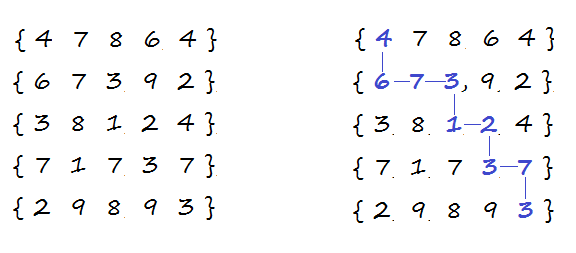

Minimum cost path in a matrix

The highlighted path shows the minimum cost path having a cost of 36.
 

In [ ]:
def find_min_cost(m, n, cost):
  pass

  